In [1]:

import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")


Tensor Flow Version: 2.2.0
Pandas 0.25.1
Scikit-Learn 0.23.1


In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\Users\\aSusTouch\\Anaconda3\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [5]:
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['teshirt' , 'trousers' , 'pullover' , 'dress' , 'coat' , 'sandal' , 'shirt' , 'sneaker' , 'bag' , 'ankle boot']

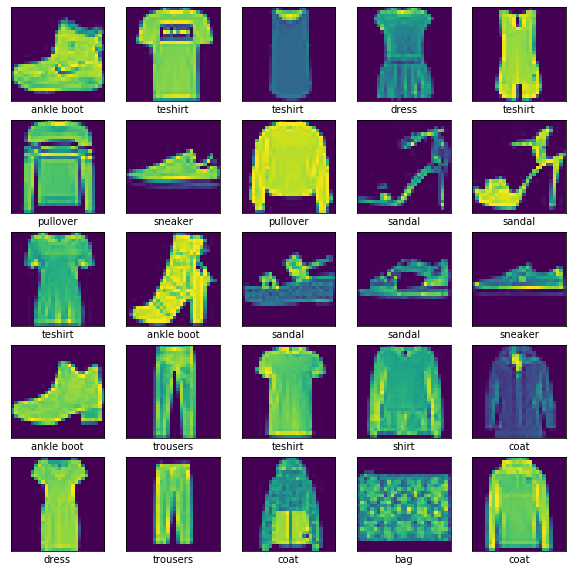

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],)   #cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Reshape

In [8]:
#train_images = train_images.reshape(train_images.shape[0] , 28 , 28 , 1)3
#test_images = test_images.reshape(test_images.shape[0] , 28 , 28 , 1)

## Define the model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train

In [14]:
#model.fit(train_images, train_labels , epochs=10)

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2512 - accuracy: 0.6888
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6777 - accuracy: 0.7482
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5893 - accuracy: 0.7821
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5508 - accuracy: 0.8081
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5141 - accuracy: 0.8224
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4993 - accuracy: 0.8269
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4817 - accuracy: 0.8321
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4851 - accuracy: 0.8332
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4714 - accuracy: 0.8365
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.466

## Make Predictions

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.5865 - accuracy: 0.8075
Test accuracy: 0.8075000047683716


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([8.0563646e-12, 3.3269817e-11, 7.7001578e-35, 4.5616155e-10,
       2.6725320e-32, 1.4693685e-01, 1.7214209e-24, 9.8284759e-02,
       2.1502210e-11, 7.5477833e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

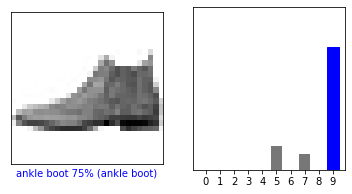

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

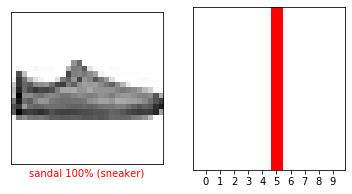

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

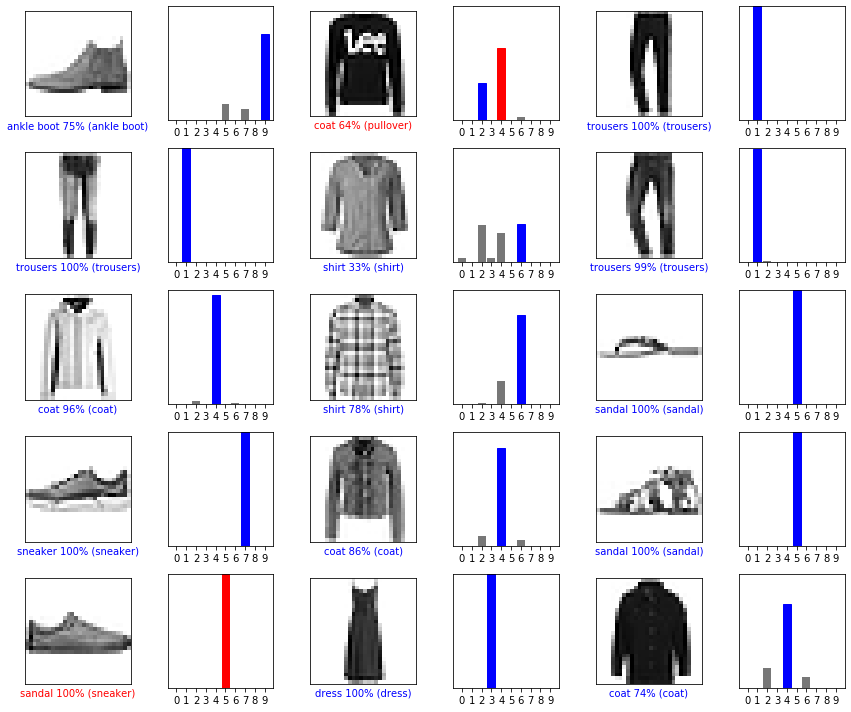

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [26]:
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


## Now predict the correct label for this image:


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.6466043e-04 2.6784958e-08 3.2725036e-01 1.6760138e-03 6.3828802e-01
  6.8631415e-20 3.1920213e-02 0.0000000e+00 6.0094237e-07 0.0000000e+00]]


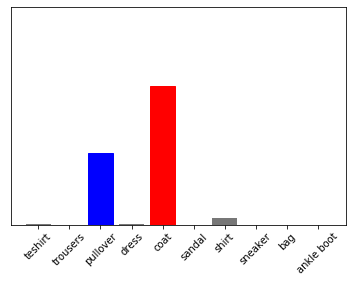

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

4